In [2]:
import networkx as nx

G = nx.read_gpickle('./data/padded_train/Malware/67bc86683b9b63d6c22f238c54c15e8e3cc4e80a14e0689363e7c5cb88941598.gpickle')

In [3]:
G.nodes[99]

{'bName': '0x80482cc[10]',
 'Start': 134513356,
 'End': 134513364,
 'Next': [134513376, 134513366],
 'Ins': [(134513356, ['mov', 'ax, word ptr [ebp - 0x22]']),
  (134513360, ['cmp', 'ax, 3']),
  (134513364, ['je', '0x80482e0'])],
 'Prev': [134513350],
 'feat': [1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 2.0, 0.2572375658618493]}

In [4]:
G.edges(98)

OutMultiEdgeDataView([(98, 99), (98, 275)])

In [5]:
weakly_connected_subgraphs = nx.weakly_connected_components(G)

In [6]:
weakly_subgraphs = [subgraph for subgraph in weakly_connected_subgraphs if len(subgraph) > 2]

In [7]:
len(weakly_subgraphs[0])

305

In [8]:
H = nx.read_gpickle('./interpretability_results/Malware/67bc86683b9b63d6c22f238c54c15e8e3cc4e80a14e0689363e7c5cb88941598./subgraph_10percent.gpickle')

In [9]:
weakly_connected_subgraphs_H = nx.weakly_connected_components(H)

In [10]:
weakly_subgraphs_H = [subgraph for subgraph in weakly_connected_subgraphs_H if len(subgraph) >= 2]

In [39]:
weakly_subgraphs_H

[{47, 49, 51, 54, 55, 57, 58, 60, 271, 272},
 {98, 99, 100, 101, 102, 103, 118},
 {144, 147, 148, 151, 152, 154, 279, 281},
 {162,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  184,
  185,
  186,
  187,
  196,
  197,
  200,
  203,
  210,
  211,
  212,
  221,
  223,
  224,
  285}]

In [103]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [321]:
summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86/'
filename = '67bc86683b9b63d6c22f238c54c15e8e3cc4e80a14e0689363e7c5cb88941598'
ACFG = nx.read_gpickle(summary_dir + filename + '.pickle')
ACFG = nx.MultiDiGraph(ACFG)

## Parting Testing samples

In [1]:
def read_pickle(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    file.close()
    return data

In [2]:
def Caculate_CFG_boundary(CFG): 
    CFG_Start = int(CFG.nodes[0]['x'][0][0].split('[')[0], 16)
    CFG_End = int(CFG.nodes[0]['x'][-1][0].split('[')[0], 16)
    for node, data in CFG.nodes(data=True):
        if "temp" in str(node):
            continue
        Start = int(data['x'][0][0].split('[')[0], 16)
        End = int(data['x'][-1][0].split('[')[0], 16)
        if Start < CFG_Start:
            CFG_Start = Start
        if CFG_End < End:
            CFG_End = End
    while CFG_End % 4:
        CFG_End += 1
    return CFG_Start, CFG_End + 4 

In [3]:
def Partition(G, node, address):
    
    # if len(G.nodes[node]['x']) < 2:
    #     return G, address
    part_ins = G.nodes[node]['x'][:-1]
    G.nodes[node]['x'] = [[G.nodes[node]['x'][0][0]] + G.nodes[node]['x'][-1][1:]]
    G.nodes[node]['NodeName'] = 'Partition_Node_' + str(node) + '_' + str(len(part_ins))
    in_nodes = [edge[0] for edge in G.in_edges(node)]

    edges_to_remove = list(G.in_edges(node))
    G.remove_edges_from(edges_to_remove)
    FirstNode = True
    for i, ins in enumerate(part_ins):
        part_cnt = len(G.nodes)
        NName = 'Partition_Node_' + str(node) + '-' + str(i)
        newnode = part_cnt
        ins[0] = str(hex(address))
        address += 4
        newins = [ins, [str(hex(address)), 'jmp ' + str(hex(address + 4))]]
        address += 4
        G.add_node(newnode, x = newins, NodeName = NName)
        for in_node in in_nodes:
            G.add_edge(in_node, newnode)
            if FirstNode: 
                if G.nodes[in_node]['x'][-1][1].split()[-1] == G.nodes[node]['x'][0][0]:
                    G.nodes[in_node]['x'][-1][1].split()[-1] = G.nodes[newnode]['x'][0][0]
                else:
                    G.nodes[in_node]['x'] += [[str(hex(int(G.nodes[in_node]['x'][-1][0].split('[')[0], 16) + 4 )), 'jmp ' + G.nodes[newnode]['x'][0][0]]]
        in_nodes = [newnode]
        FirstNode = False
    G.nodes[newnode]['x'][-1][1] = 'jmp ' + str(G.nodes[node]['x'][0][0])

    G.add_edge(in_nodes[0], node)    
    return G, address

In [53]:
from tqdm import tqdm
import networkx as nx
import os
import pickle
from Generate_poison_data import Generate_ACFG_Node_Attributes, Append_temp_nodes

target_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data_testing/padded_test/Malware'
important_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/poison_interpretability_results/Malware'
summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86'
Malware_files = []
num_not_complete = 0
# times = 1

with open(target_path + "/0_list.txt", "r") as f:
    for line in f.readlines():
        Malware_files.append(line.strip()[:-8])
f.close()
orignal_num_nodes = 0
num_of_node = {}
for filename in tqdm(Malware_files):
    
    ## read importance_score and top_blocks
    score_path = os.path.join(important_path, filename, 'importance_score.pickle')
    importance_score = read_pickle(score_path)
    top_path = os.path.join(important_path, filename, 'top_blocks.pickle')
    top_blocks = read_pickle(top_path)

    file_path = os.path.join(summary_dir, filename)
    G = nx.read_gpickle(file_path + '.pickle')
    _, address = Caculate_CFG_boundary(G)
    orignal_num_nodes = G.number_of_nodes()

    if orignal_num_nodes not in num_of_node:
        num_of_node[orignal_num_nodes] = 1
    else:
        num_of_node[orignal_num_nodes] += 1

    block_cnt = 15
    for block in top_blocks:
        ## if top block not in G then continue 
        if block >= orignal_num_nodes:
            continue
        num_part_node = len(G.nodes[block]['x'])

        ## make sure the block which will be parting have more than 2 lines
        if num_part_node < 2:
            continue
        
        ## if size of G not enough to partition, the importance_score in block is 0 or block_cnt is 0 then break  
        if G.number_of_nodes() + num_part_node > 512 or importance_score[block].numpy()[0] == 0.0 or block_cnt <= 0:      
            break
        G, address = Partition(G, block, address)
        block_cnt -= 1
    
    if block_cnt != 0:
        num_not_complete += 1

    ACFG = Generate_ACFG_Node_Attributes(G)    
    if ACFG.number_of_nodes() < 512:
        ACFG = Append_temp_nodes(ACFG)
    # nx.write_gpickle(ACFG, '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/Partition_samples/padded_test/Malware/' + filename + ".gpickle")
print('Not Full Partition samples :', 500 - num_not_complete)

100%|██████████| 500/500 [00:31<00:00, 16.00it/s]

Not Full Partition samples : 335


: 

## Add Trigger and Parting Testing samples

In [4]:
from tqdm import tqdm
import networkx as nx
import os
import pickle
from Generate_poison_data import Generate_ACFG_Node_Attributes, Append_temp_nodes, Add_Trigger_to_ACFG

target_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data_testing/padded_test/Malware'
important_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/poison_interpretability_results/Malware'
summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86'
trigger_path = './trigger/trigger.gpickle'
Malware_files = []
num_not_complete = 0
# times = 1
trigger_times = 13

with open(target_path + "/0_list.txt", "r") as f:
    for line in f.readlines():
        Malware_files.append(line.strip()[:-8])
f.close()
orignal_num_nodes = 0
num_of_node = {}
for filename in tqdm(Malware_files):
    
    ## read importance_score and top_blocks
    score_path = os.path.join(important_path, filename, 'importance_score.pickle')
    importance_score = read_pickle(score_path)
    top_path = os.path.join(important_path, filename, 'top_blocks.pickle')
    top_blocks = read_pickle(top_path)

    file_path = os.path.join(summary_dir, filename)
    G = nx.read_gpickle(file_path + '.pickle')
    _, address = Caculate_CFG_boundary(G)
    orignal_num_nodes = G.number_of_nodes()

    if orignal_num_nodes not in num_of_node:
        num_of_node[orignal_num_nodes] = 1
    else:
        num_of_node[orignal_num_nodes] += 1

    block_cnt = 15
    for block in top_blocks:
        ## if top block not in G then continue 
        if block >= orignal_num_nodes:
            continue
        num_part_node = len(G.nodes[block]['x'])

        ## make sure the block which will be parting have more than 2 lines
        if num_part_node < 2:
            continue
        
        ## if size of G not enough to partition, the importance_score in block is 0 or block_cnt is 0 then break  
        if G.number_of_nodes() + num_part_node + (11 * trigger_times) > 512 or importance_score[block].numpy()[0] == 0.0 or block_cnt <= 0:      
            break
        G, address = Partition(G, block, address)
        block_cnt -= 1
    
    if block_cnt != 0:
        num_not_complete += 1

    ACFG = Generate_ACFG_Node_Attributes(G)

    starting_point = 0
    for _ in range(trigger_times):
        if ACFG.number_of_nodes() + 11 > 512:    ## trigger size = 11 edges = 17
            # mal_node_cnt += 1
            print('Not enough!')
            break
        ACFG, starting_point = Add_Trigger_to_ACFG(ACFG, trigger_path, starting_point)
    
    if ACFG.number_of_nodes() < 512:
        ACFG = Append_temp_nodes(ACFG)
    # continue
    nx.write_gpickle(ACFG, '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/Add_trigger_partition_samples/padded_test/Malware/' + filename + ".gpickle")
print('Not Full Partition samples :', 500 - num_not_complete)

100%|██████████| 500/500 [07:46<00:00,  1.07it/s]

Not Full Partition samples : 289


In [5]:
print('Not Full Partition samples :', 500 - num_not_complete)

Not Full Partition samples : 289


: 

1 : 335
2 : 335
3 : 332
4 : 332
5 : 332
6 : 322
7 : 322
8 : 322
9 : 322
10: 322
11: 322
12: 302
13: 289

## Parting Trigger

In [315]:
import pickle

with open("/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/interpretability_results/Malware/67bc86683b9b63d6c22f238c54c15e8e3cc4e80a14e0689363e7c5cb88941598/top_blocks.pickle", "rb") as f:
    data = pickle.load(f)

print(data)


[99, 306, 100, 148, 57, 211, 102, 185, 218, 174, 55, 60, 210, 151, 279, 272, 320, 197, 224, 221, 171, 177, 118, 179, 203, 154, 144, 147, 281, 103, 101, 196, 223, 285, 220, 187, 176, 212, 178, 202, 283, 325, 134, 277, 175, 186, 152, 130, 219, 200, 184, 136, 115, 232, 117, 121, 140, 155, 192, 209, 216, 229, 255, 258, 287, 228, 116, 127, 131, 133, 278, 143, 260, 225, 205, 259, 324, 124, 126, 122, 180, 198, 230, 233, 195, 207, 217, 227, 238, 262, 280, 145, 206, 226, 234, 237, 261, 282, 284, 286, 254, 215, 191, 172, 183, 123, 235, 239, 128, 138, 146, 129, 181, 199, 231, 240, 135, 142, 159, 160, 189, 194, 204, 214, 242, 244, 247, 253, 132, 149, 150, 182, 241, 208, 236, 28, 52, 252, 213, 257, 188, 222, 201, 137, 95, 157, 164, 139, 243, 156, 248, 32, 96, 98, 161, 165, 170, 37, 49, 63, 67, 71, 250, 34, 249, 275, 74, 104, 61, 270, 319, 158, 54, 162, 166, 169, 47, 73, 58, 329, 72, 44, 330, 39, 56, 97, 251, 3, 7, 76, 106, 110, 269, 0, 11, 40, 59, 114, 256, 173, 310, 51, 75, 141, 48, 64, 193, 26, 5

In [2]:
import networkx as nx

trigger = nx.read_gpickle('./trigger/trigger.gpickle')
trigger

In [3]:
trigger.nodes()

NodeView(('Trigger_Node_0', 'Trigger_Node_1', 'Trigger_Node_2', 'Trigger_Node_3', 'Trigger_Node_4', 'Trigger_Node_5', 'Trigger_Node_6', 'Trigger_Node_7', 'Trigger_Node_8', 'Trigger_Node_9', 'Trigger_Node_10'))

In [389]:
trigger.nodes['Trigger_Node_3']

{'bName': '0x40b8d7[3]',
 'Start': 4241623,
 'End': 4241624,
 'Next': [],
 'Ins': [(4241623, ['pop', 'rbp']), (4241624, ['jmp', 'rax'])],
 'Prev': [4241621],
 'feat': [0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0],
 'NodeName': 'Trigger_Node_3'}

In [356]:
len(G.nodes)

4096

In [3]:
import networkx as nx
T = nx.read_gpickle('./trigger/trigger.gpickle')

In [5]:
T.nodes()

NodeView(('Trigger_Node_0', 'Trigger_Node_1', 'Trigger_Node_2', 'Trigger_Node_3', 'Trigger_Node_4', 'Trigger_Node_5', 'Trigger_Node_6', 'Trigger_Node_7', 'Trigger_Node_8', 'Trigger_Node_9', 'Trigger_Node_10'))

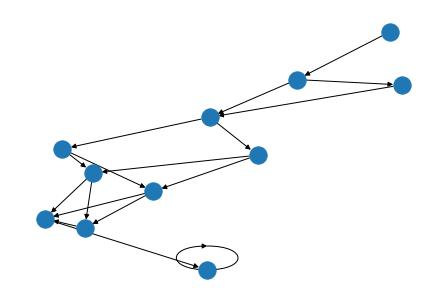

In [50]:
nx.draw(T)

In [44]:
for node, data in T.nodes(data=True):
    print(node, data)

Trigger_Node_0 {'Start': 4270670, 'End': 4270673, 'Next': [4270678, 4270675], 'Ins': [(4270670, ['and', 'edx, 1']), (4270673, ['je', '0x412a56'])], 'Prev': [4270659, 4270666], 'feat': [1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.18841011929247223], 'NodeName': 'Trigger_Node_0'}
Trigger_Node_1 {'Start': 4270678, 'End': 4270690, 'Next': [4270696, 4271025], 'Ins': [(4270678, ['test', 'r13b, 1']), (4270682, ['mov', 'rdi, r13']), (4270685, ['mov', 'edx, 0x400']), (4270690, ['jne', '0x412bb1'])], 'Prev': [4270673, 4270675], 'feat': [2.0, 0.0, 2.0, 0.0, 4.0, 1.0, 2.0, 0.1891505553270259], 'NodeName': 'Trigger_Node_1'}
Trigger_Node_2 {'Start': 4270696, 'End': 4270700, 'Next': [4270706, 4271048], 'Ins': [(4270696, ['test', 'dil, 2']), (4270700, ['jne', '0x412bc8'])], 'Prev': [4270690], 'feat': [1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.09268305224187576], 'NodeName': 'Trigger_Node_2'}
Trigger_Node_3 {'Start': 4271025, 'End': 4271042, 'Next': [4270706, 4271048], 'Ins': [(4271025, ['lea', 'rdi, [r13 + 1]']),

In [35]:
summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86/0a2a46d5f4db9d49feb49e8c235aea615c55d38823354570358bfce435cfa9ea.pickle'
G = nx.read_gpickle(summary_dir)
A = list(G.in_edges(1))

In [3]:
# ## Generate partition node
# ## partition start : Partition_Node_0 
# ## partition End : Partition_Node_8

# import networkx as nx

# def Generate_Partition_Graph(node, partition_address, part_ins):
#     """
#     Generate Partition Graph:
#     Start point : Partition_Node_0,  replace Partition_Node_0 with node
#     End point : Partition_Node_8
#     """
#     # 建立一個空的多重有向圖
#     PGraph = nx.MultiDiGraph()

#     mapping = {}
#     # 插入節點並設置屬性
#     for i in range(11):
#         PGraph.add_node(i, NodeName='Partition_Node_'+ str(i))
#         mapping[i] = 'Partition_Node_'+ str(i)

#     # 插入17條邊
#     edges = [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 9), (4, 5), (4, 10), (5, 6), (5, 7), (6, 7), (7, 8), (8, 8), (9, 5), (9, 10), (10, 6), (10, 7)]
#     PGraph.add_edges_from(edges)
    
#     ## nodes: 0
#     PGraph.nodes[0]['x'] = [[hex(partition_address), 'jmp '+ hex(partition_address + 4)]]
#     ## nodes: 1
#     PGraph.nodes[1]['x'] = [[hex(partition_address + 4), 'cmp rax rax'], 
#                             [hex(partition_address + 8), 'jne '+ hex(partition_address + 16)]]
#     ## node: 2
#     PGraph.nodes[2]['x'] = [[hex(partition_address + 12), 'jmp '+ hex(partition_address + 16)]]
#     ## node: 3
#     PGraph.nodes[3]['x'] = [[hex(partition_address + 16), 'cmp rax rax'], 
#                             [hex(partition_address + 20), 'jne '+ hex(partition_address + 44)]]
#     ## node: 4
#     PGraph.nodes[4]['x'] = [[hex(partition_address + 24), 'cmp rax rax'], 
#                             [hex(partition_address + 28), 'jne '+ hex(partition_address + 52)]]
#     ## node: 5
#     PGraph.nodes[5]['x'] = [[hex(partition_address + 32), 'cmp rax rax'], 
#                             [hex(partition_address + 36), 'jne '+ hex(partition_address + 60)]]
#     ## node: 6
#     PGraph.nodes[6]['x'] = [[hex(partition_address + 40), 'jmp '+ hex(partition_address + 60)]]
#     ## node: 9
#     PGraph.nodes[9]['x'] = [[hex(partition_address + 44), 'cmp rax rax'], 
#                             [hex(partition_address + 48), 'jne '+ hex(partition_address + 32)]]
#     ## node: 10
#     PGraph.nodes[10]['x'] = [[hex(partition_address + 52), 'cmp rax rax'], 
#                              [hex(partition_address + 56), 'jne '+ hex(partition_address + 40)]]
#     ## node: 7
#     PGraph.nodes[7]['x'] = [[hex(partition_address + 60), 'jmp '+ hex(partition_address + 64)]]
#     ## node: 8 
#     PGraph.nodes[8]['x'] = [[hex(partition_address + 64), 'cmp rax rax'], 
#                             [hex(partition_address + 68), 'jne '+ hex(partition_address + 64)]]


#     PGraph = nx.relabel.relabel_nodes(PGraph, mapping)
#     # nx.write_gpickle(PGraph, './trigger/partition.gpickle')
#     return PGraph


In [26]:
def Generate_Partition_Graph(partition_address, part_ins):
    """
    Generate Partition Graph:
    Start point : Partition_Node_0,  replace Partition_Node_0 with node
    End point : Partition_Node_8
    """
    # 建立一個空的多重有向圖
    PGraph = nx.DiGraph()

    mapping = {}
    # 插入節點並設置屬性
    for i in range(11):
        PGraph.add_node(i, NodeName='Partition_Node_'+ str(i))
        mapping[i] = 'Partition_Node_'+ str(i)

    # 插入17條邊
    edges = [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 9), (4, 5), (4, 10), (5, 6), (5, 7), (6, 7), (7, 8), (8, 8), (9, 5), (9, 10), (10, 6), (10, 7)]
    PGraph.add_edges_from(edges)


    Node_Ins = {
        0: [['jmp ']],
        1: [['cmp rax rax'],
            ['jne ']],
        2: [['jmp ']],
        3: [['cmp rax rax'], 
            ['jne ']],
        4: [['cmp rax rax'], 
            ['jne ']],
        5: [['cmp rax rax'], 
            ['jne ']],
        6: [['jmp ']],
        9: [['cmp rax rax'], 
            ['jne ']],
        10:[['cmp rax rax'], 
            ['jne ']],
        7: [['jmp ']],
        8: [['cmp rax rax'], 
            ['jne ']]
    }

    # 计算每个节点的指令插入数量
    avg_insert_count = len(part_ins) // 9
    ins_cnt = 0
    # 遍历节点并插入指令
    for i in range(11):
        new_instructions = []
        num_ins = 0

        if i == 7 or i == 8:
            continue

        ## 插入指令
        num_ins = avg_insert_count
        if i < len(part_ins) % 9:
            num_ins = avg_insert_count + 1

        for _ in range(num_ins):
            new_instruction = [hex(partition_address), part_ins[ins_cnt][1]]
            new_instructions.append(new_instruction)
            partition_address += 4
            ins_cnt += 1

        for ins in Node_Ins[i]:
            new_instruction = [hex(partition_address), ins[0]]
            new_instructions.append(new_instruction)
            partition_address += 4

        # 更新节点的指令列表
        PGraph.nodes[i]['x'] = new_instructions

    ## 不用inject ins 的 node
    for i in range(7, 9):
        new_instructions = []
        for ins in Node_Ins[i]:
            new_instruction = [hex(partition_address), ins[0]]
            new_instructions.append(new_instruction)
            partition_address += 4
        PGraph.nodes[i]['x'] = new_instructions   

    ## 最後再調整
    PGraph = nx.relabel_nodes(PGraph, mapping)
    return PGraph


In [110]:
def Caculate_CFG_boundary(CFG): 
    CFG_Start = int(CFG.nodes[0]['x'][0][0].split('[')[0], 16)
    CFG_End = int(CFG.nodes[0]['x'][-1][0].split('[')[0], 16)
    for node, data in CFG.nodes(data=True):
        if "temp" in str(node):
            continue
        Start = int(data['x'][0][0].split('[')[0], 16)
        End = int(data['x'][-1][0].split('[')[0], 16)
        if Start < CFG_Start:
            CFG_Start = Start
        if CFG_End < End:
            CFG_End = End
    while CFG_End % 4 != 0:
        CFG_End += 1
    return CFG_Start, CFG_End + 4

In [111]:
# def Partition_Node(G, node):
#     part_ins = G.nodes[node]['x']
#     part_edges = [i[1] for i in list(G.edges(node))]
#     part_inedges = [i[0] for i in list(G.in_edges(node))]
#     _, G_End = Caculate_CFG_boundary(G)
    
#     PGraph = Generate_Partition_Graph(G_End, part_ins)
    
#     mapping = {}
#     newnode = G.number_of_nodes()
#     for P_node in PGraph.nodes(data=False):
#         if str(P_node) == 'Partition_Node_0':
#             mapping[P_node] = node
#         else:
#             mapping[P_node] = newnode
#             newnode += 1
#     CFG =  nx.union(G, PGraph)
    
#     ## add edge to PGraph
#     for part_edge in part_edges:
#         CFG.add_edge('Partition_Node_8', part_edge)
#     for part_inedge in part_inedges:
#         CFG.add_edge(part_inedge, 'Partition_Node_0')

#     ## remove node
#     CFG.remove_node(node)
#     CFG = nx.relabel_nodes(CFG, mapping) 
#     return CFG

In [164]:
# from tqdm import tqdm
# import networkx as nx
# import os
# import pickle
# from Generate_poison_data import Generate_ACFG_Node_Attributes, Append_temp_nodes

# target_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data_testing/padded_test/Malware/'
# important_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/poison_interpretability_results/Malware'
# summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86'
# Malware_files = []

# with open(target_path + "/0_list.txt", "r") as f:
#     for line in f.readlines():
#         Malware_files.append(line.strip()[:-8])
# f.close()

# for filename in tqdm(Malware_files):
    
#     ## read importance_score and top_blocks
#     score_path = os.path.join(important_path, filename, 'importance_score.pickle')
#     importance_score = read_pickle(score_path)
#     top_path = os.path.join(important_path, filename, 'top_blocks.pickle')
#     top_blocks = read_pickle(top_path)

#     file_path = os.path.join(summary_dir, filename)
#     G = nx.read_gpickle(file_path + '.pickle')
#     orignal_num_nodes= G.number_of_nodes()
#     for block in top_blocks:        
#         ## if top block not in G continue 
#         if block >= orignal_num_nodes:
#             continue
#         ## if size of G not enough to partition or the importance_score in block is 0 then break  
#         if G.number_of_nodes() + 10 > 512 or importance_score[block].numpy()[0] == 0.0:               
#             break
#         G = Partition_Node(G, block)  
#     ACFG = Generate_ACFG_Node_Attributes(G)
#     if ACFG.number_of_nodes() < 512:
#         ACFG = Append_temp_nodes(ACFG)
#     nx.write_gpickle(ACFG, '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/Partition_samples/padded_test/Malware/' + filename + ".gpickle")

100%|██████████| 500/500 [01:16<00:00,  6.52it/s]


: 

In [1]:
def read_pickle(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    f.close()
    return data

In [2]:
def Generate_Trigger_Partition_Graph(times=3): 
    """"
    times = Trigger times
    """
    Trigger = nx.read_gpickle('/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/trigger/trigger.gpickle')
    T = Trigger
    cnt = 0
    mapping = {}
    for T_node in T.nodes(data=False):
        mapping[T_node] = cnt
        cnt += 1
    start_point = 6
    end_point = 10

    T = nx.relabel_nodes(T, mapping)
    for _ in range(times - 1):
        cnt = len(T.nodes())
        T =  nx.union(T, Trigger)
        T.add_edge(end_point, 'Trigger_Node_6')

        mapping = {}
        
        for T_node in Trigger.nodes(data=False):
            mapping[T_node] = cnt
            if str(T_node)== 'Trigger_Node_10':
                end_point = cnt
            cnt += 1
        T = nx.relabel_nodes(T, mapping)
    ## relabel trigger node
    mapping = {}
    for T_node in T.nodes(data=False):
        mapping[T_node] = 'Partition_Node_'+ str(T_node)
        if T_node == start_point:
            start_point = 'Partition_Node_'+ str(T_node)
        if T_node == end_point:
            end_point = 'Partition_Node_'+ str(T_node)
    
    T = nx.relabel_nodes(T, mapping)
    return T, start_point, end_point

In [3]:
def Trigger_Partition_Node(G, node, times):
    part_edges = [i[1] for i in list(G.edges(node))]
    part_inedges = [i[0] for i in list(G.in_edges(node))]
    
    PGraph, start_point, end_point = Generate_Trigger_Partition_Graph(times)
    
    mapping = {}
    newnode = G.number_of_nodes()
    for P_node in PGraph.nodes(data=False):
        if str(P_node) == start_point:
            mapping[P_node] = node
        else:
            mapping[P_node] = newnode
            newnode += 1
    CFG =  nx.union(G, PGraph)
    
    ## add edge to PGraph
    for part_edge in part_edges:
        CFG.add_edge(end_point, part_edge)
    for part_inedge in part_inedges:
        CFG.add_edge(part_inedge, start_point)

    ## remove node
    CFG.remove_node(node)
    CFG = nx.relabel_nodes(CFG, mapping) 
    return CFG

In [10]:
from tqdm import tqdm
import networkx as nx
import os
import pickle
from Generate_poison_data import Generate_ACFG_Node_Attributes, Append_temp_nodes

target_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data_testing/padded_test/Malware/'
important_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/poison_interpretability_results/Malware'
summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86'
Malware_files = []
num_parts = {}
times = 1

with open(target_path + "/0_list.txt", "r") as f:
    for line in f.readlines():
        Malware_files.append(line.strip()[:-8])
f.close()
orignal_num_nodes = []
for filename in tqdm(Malware_files):
    
    ## read importance_score and top_blocks
    score_path = os.path.join(important_path, filename, 'importance_score.pickle')
    importance_score = read_pickle(score_path)
    top_path = os.path.join(important_path, filename, 'top_blocks.pickle')
    top_blocks = read_pickle(top_path)

    file_path = os.path.join(summary_dir, filename)
    G = nx.read_gpickle(file_path + '.pickle')
    ACFG = Generate_ACFG_Node_Attributes(G)    
    orignal_num_nodes = ACFG.number_of_nodes()
    for block in top_blocks[:15]:        
        ## if top block not in G continue 
        if block >= orignal_num_nodes:
            continue
        num_part_node= (11 * times) - 1 
        ## if size of G not enough to partition or the importance_score in block is 0 then break  
        if ACFG.number_of_nodes() + num_part_node > 512 or importance_score[block].numpy()[0] == 0.0:      ## 3 trigger and remove 1 node (11*3-1) = 32        
            break
        ACFG = Trigger_Partition_Node(ACFG, block, times)
        
    if ACFG.number_of_nodes() < 512:
        ACFG = Append_temp_nodes(ACFG)
    nx.write_gpickle(ACFG, '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/Trigger_Partition_samples/padded_test/Malware/' + filename + ".gpickle")

100%|██████████| 500/500 [00:51<00:00,  9.72it/s]


: 

In [4]:
from tqdm import tqdm
import networkx as nx
import os
import pickle
from Generate_poison_data import Generate_ACFG_Node_Attributes, Append_temp_nodes, Add_Trigger_to_ACFG

target_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/data_testing/padded_test/Malware/'
important_path = '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/poison_interpretability_results/Malware'
summary_dir = '/mnt/bigDisk/leon/rtools/CFGs/x86'
trigger_path = './trigger/trigger.gpickle'
Malware_files = []
num_parts = {}
times = 13

with open(target_path + "/0_list.txt", "r") as f:
    for line in f.readlines():
        Malware_files.append(line.strip()[:-8])
f.close()

AddT_TP_cnt = 0
Add_Node_cnt = []
for filename in tqdm(Malware_files):
    
    ## read importance_score and top_blocks
    score_path = os.path.join(important_path, filename, 'importance_score.pickle')
    importance_score = read_pickle(score_path)
    top_path = os.path.join(important_path, filename, 'top_blocks.pickle')
    top_blocks = read_pickle(top_path)

    file_path = os.path.join(summary_dir, filename)
    G = nx.read_gpickle(file_path + '.pickle')
    ACFG = Generate_ACFG_Node_Attributes(G)
    orignal_num_nodes = ACFG.number_of_nodes()

    ## Inject trigger 
    starting_point = 0
    for _ in range(times):
        if ACFG.number_of_nodes() + 11 > 512:    ## trigger size = 11 edges = 17
            # mal_node_cnt += 1
            print('Not enough!')
            break
        ACFG, starting_point = Add_Trigger_to_ACFG(ACFG, trigger_path, starting_point)    
    
    ## Use Trigger to Partition    
    for block in top_blocks[:15]:        
        ## if top block not in G continue 
        if block >= orignal_num_nodes:
            continue
        num_part_node= (11 * times) - 1 
        ## if size of G not enough to partition or the importance_score in block is 0 then break  
        if ACFG.number_of_nodes() + num_part_node > 512 or importance_score[block].numpy()[0] == 0.0:      ## 3 trigger and remove 1 node (11*3-1) = 32
            AddT_TP_cnt += 1
            break
        ACFG = Trigger_Partition_Node(ACFG, block, times)
    Add_Node_cnt.append(ACFG.number_of_nodes() - orignal_num_nodes)
    if ACFG.number_of_nodes() < 512:
        ACFG = Append_temp_nodes(ACFG)
    nx.write_gpickle(ACFG, '/home/ycchiu/git-rep/CFGE2BA/CFGExplainer/AddTrigger_Trigger_Partition_samples/padded_test/Malware/' + filename + ".gpickle")

100%|██████████| 500/500 [05:56<00:00,  1.40it/s]


In [6]:
print('Avg num of Add node', AddT_TP_cnt, sum(Add_Node_cnt)/500)

Avg num of Add node 478 206.332


: 

1 :  33, 133.52
2 : 342, 191.512
3 : 401, 216.168
4 : 413, 218.924
5 : 457, 217.54
6 : 462, 239.03
7 : 462, 218.208
8 : 468, 228.244
9 : 468, 244.236
10: 475, 192.84
11: 475, 203.08
12: 478, 206.408
13: 478, 206.332